In [152]:
%matplotlib inline

from matplotlib import pyplot as plt
from matplotlib.patches import Circle, Wedge, Ellipse, Arc
from matplotlib.collections import PatchCollection

import numpy as np
import subprocess as sp

[0.15000000000000002, 0.08964606185918872] [-0.03, 0]
149.13575461381234
[-0.01420951 -0.02642139]


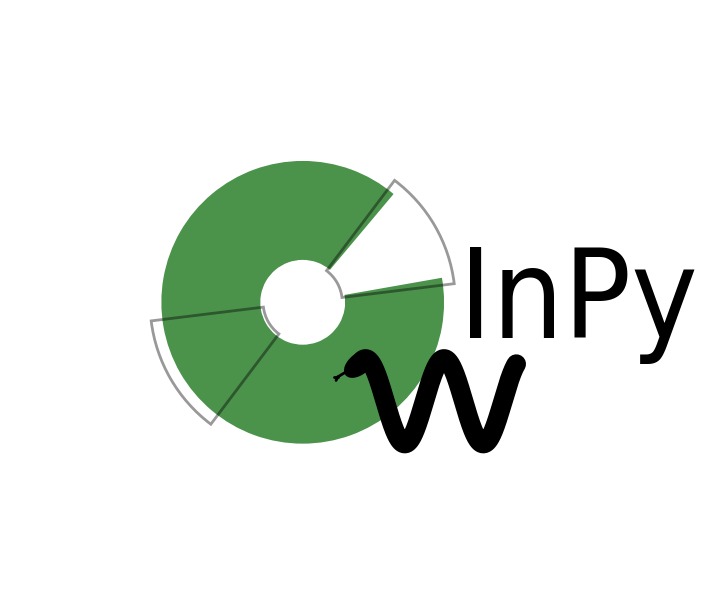

In [32]:
fig = plt.figure(figsize=(4, 4), dpi=200)
ax = fig.add_subplot(111, aspect='equal')

sw = 50
ew = 10
cw = 3
wedge1 = Wedge((0, 0), 1, sw, ew, width=0.7, facecolor="darkgreen", alpha=0.7)
wedge2 = Wedge((0, 0), 1.08, ew+180-cw, sw+180+cw, width=0.8, facecolor="none", edgecolor=(0,0,0,0.4))
wedge3 = Wedge((0, 0), 1.08, ew-cw, sw+cw, width=0.8, facecolor="none", edgecolor=(0,0,0,0.4))

#ax.axis("equal")
ax.add_artist(wedge1)
ax.add_artist(wedge2)
ax.add_artist(wedge3)
ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])

f = 1.8
phi0 = -0.5
xstart = 0.4
xend = xstart + (1 / f) * 2
xvalues = np.linspace(xstart, xend, 1000)
offset = -0.7
scale = 0.3
doubleu = offset + scale * np.cos(2.0 * np.pi * f * (xvalues - xvalues[0]) + phi0)
ax.plot(
    xvalues,
    doubleu,
    'k',
    solid_capstyle='round',
    lw=7,
)

angle = 39
ell = Ellipse((xvalues[0], doubleu[0]), 0.25, 0.15, angle=angle, facecolor="k")
ax.add_artist(ell)

tonguelen = 0.15
yv = tonguelen * np.arctan(np.deg2rad(angle))
tongueend = (xvalues[0] - tonguelen, doubleu[0] - yv)
ax.plot([tongueend[0], xvalues[0]], [tongueend[1], doubleu[0]], "k", linewidth=1)
ax.plot([tongueend[0] - 0.03, tongueend[0]], [tongueend[1], tongueend[1]], "k", linewidth=1, solid_capstyle="round")

tonguevec = [-0.03, 0]

vec1 = [xvalues[0] - tongueend[0], doubleu[0] - tongueend[1]]
vec2 = [-0.03, 0]
print(vec1, vec2)

angle = np.arccos(np.dot(vec1, vec2)/(np.linalg.norm(vec1) * np.linalg.norm(vec2)))
print(np.rad2deg(angle))
rotangle = 2 * (np.pi - angle)

R = np.array([[np.cos(rotangle), -np.sin(rotangle)], [np.sin(rotangle), np.cos(rotangle)]])
rvec = np.dot(R, tonguevec)
print(rvec)
ax.plot([tongueend[0] + rvec[0], tongueend[0]], [tongueend[1] + rvec[1], tongueend[1]], "k", linewidth=1, solid_capstyle="round")

ax.text(xvalues[int(len(xvalues)//2)]+0.15, -0.25, "InPy", fontsize=45, fontstretch="ultra-condensed")
plt.tight_layout()

ax.axis("off");

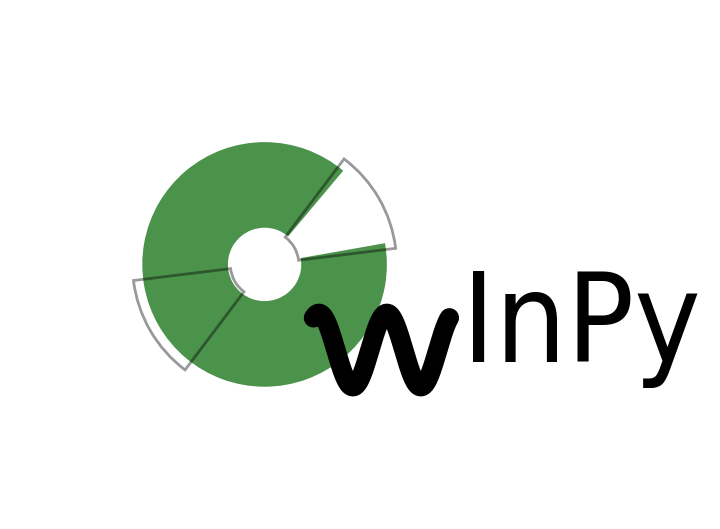

In [147]:
fig = plt.figure(figsize=(4, 4), dpi=200)
ax = fig.add_subplot(111, aspect='equal')

sw = 50
ew = 10
cw = 3
wedge1 = Wedge((0, 0), 1, sw, ew, width=0.7, facecolor="darkgreen", alpha=0.7)
wedge2 = Wedge((0, 0), 1.08, ew+180-cw, sw+180+cw, width=0.8, facecolor="none", edgecolor=(0,0,0,0.4))
wedge3 = Wedge((0, 0), 1.08, ew-cw, sw+cw, width=0.8, facecolor="none", edgecolor=(0,0,0,0.4))

#ax.axis("equal")
ax.add_artist(wedge1)
ax.add_artist(wedge2)
ax.add_artist(wedge3)
ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])

f = 1.8
phi0 = -0.5
xstart = 0.4
xend = xstart + (1 / f) * 2
xvalues = np.linspace(xstart, xend, 1000)
offset = -0.7
scale = 0.3
doubleu = offset + scale * np.cos(2.0 * np.pi * f * (xvalues - xvalues[0]) + phi0)
ax.plot(
    xvalues,
    doubleu,
    'k',
    solid_capstyle='round',
    lw=7,
)

ax.text(xvalues[-1]+0.1, offset - 0.1, "InPy", fontsize=45, fontstretch="ultra-condensed")
plt.tight_layout()

ax.axis("off");

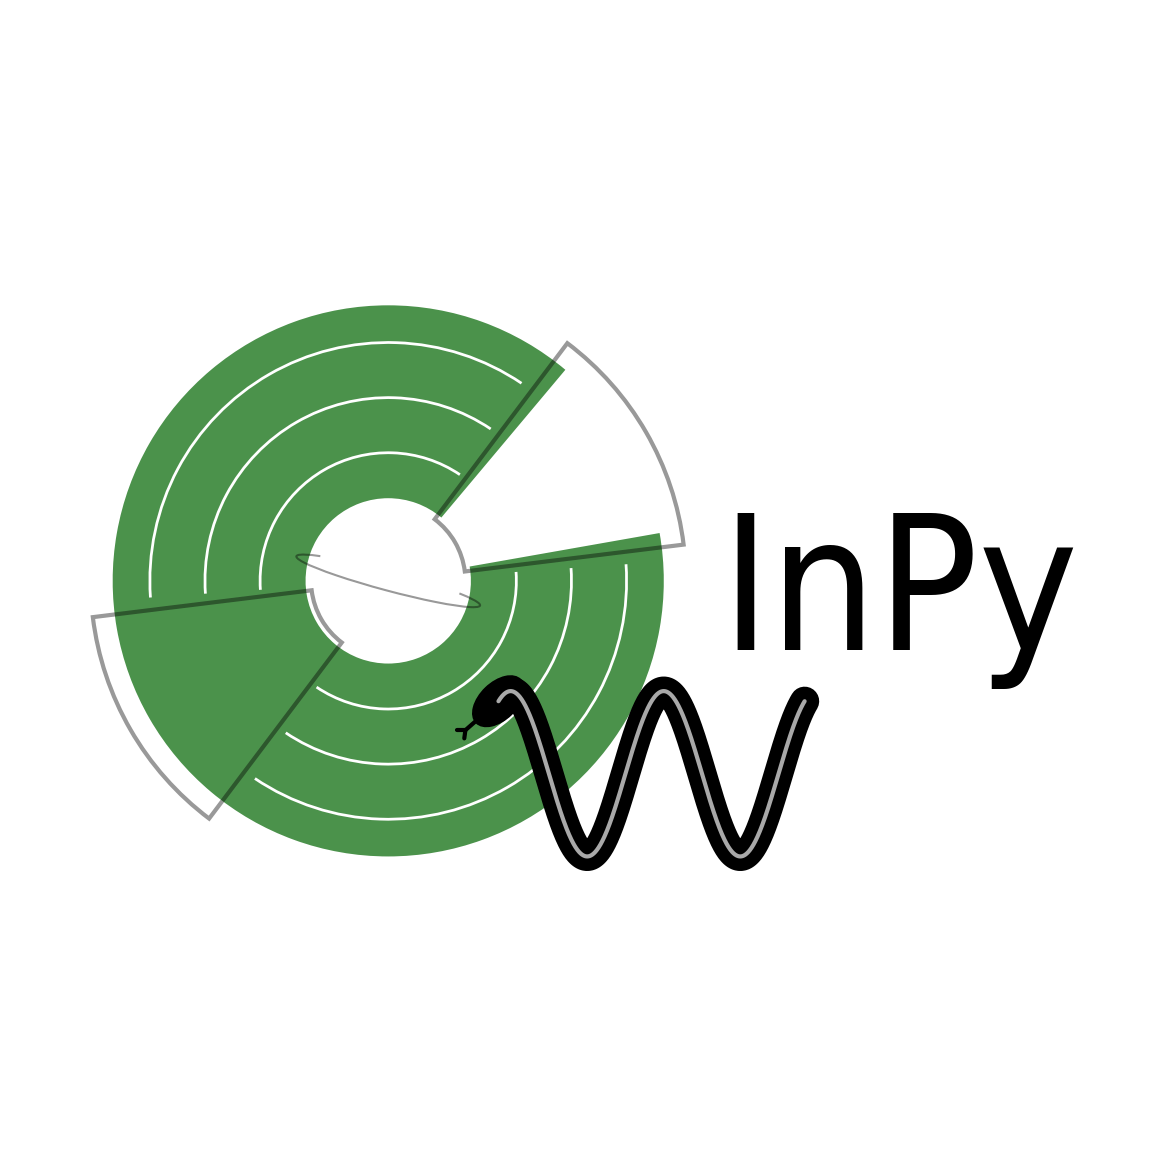

In [166]:
fig = plt.figure(figsize=(4, 4), dpi=300)
ax = fig.add_subplot(111, aspect='equal')
#fig, ax = plt.subplots(figsize=(7,5), dpi=200)

# Move things over
XOFFSET = -0.7

# create "C"
sw = 50
ew = 10
cw = 3
wedge1 = Wedge((XOFFSET, 0), 1, sw, ew, width=0.7, facecolor="darkgreen", alpha=0.7)

# create beams
wedge2 = Wedge((XOFFSET, 0), 1.08, ew+180-cw, sw+180+cw, width=0.8, facecolor="none", edgecolor=(0,0,0,0.4))
wedge3 = Wedge((XOFFSET, 0), 1.08, ew-cw, sw+cw, width=0.8, facecolor="none", edgecolor=(0,0,0,0.4))

# create "waves"
ring1 = Wedge((XOFFSET, 0), 0.47, sw+2*cw, ew+180-2*cw, width=0.01, facecolor="white", alpha=1)
ring2 = Wedge((XOFFSET, 0), 0.67, sw+2*cw, ew+180-2*cw, width=0.01, facecolor="white", alpha=1)
ring3 = Wedge((XOFFSET, 0), 0.87, sw+2*cw, ew+180-2*cw, width=0.01, facecolor="white", alpha=1)

oring1 = Wedge((XOFFSET, 0), 0.47, sw+2*cw+180, ew+2*180-2*cw, width=0.01, facecolor="white", alpha=1)
oring2 = Wedge((XOFFSET, 0), 0.67, sw+2*cw+180, ew+2*180-2*cw, width=0.01, facecolor="white", alpha=1)
oring3 = Wedge((XOFFSET, 0), 0.87, sw+2*cw+180, ew+2*180-2*cw, width=0.01, facecolor="white", alpha=1)

# add "C"
ax.add_artist(wedge1)

# add beams
ax.add_artist(wedge2)
ax.add_artist(wedge3)

# add waves
ax.add_artist(ring1)
ax.add_artist(ring2)
ax.add_artist(ring3)

# opposite side waves
ax.add_artist(oring1)
ax.add_artist(oring2)
ax.add_artist(oring3)

# spin
arc1 = Arc(
    (XOFFSET, 0),
    width=0.69,
    height=0.07,
    angle=345,
    theta1=175,
    theta2=365.0,
    edgecolor=(0,0,0,0.4),
    lw=0.5,
)

ax.add_artist(arc1)

# add "W"
f = 1.8
phi0 = -0.5
xstart = 0.4 + XOFFSET
xend = xstart + (1 / f) * 2
xvalues = np.linspace(xstart, xend, 1000)
offset = -0.7
scale = 0.3
doubleu = offset + scale * np.cos(2.0 * np.pi * f * (xvalues - xvalues[0]) + phi0)
ax.plot(
    xvalues,
    doubleu,
    'k',
    solid_capstyle='round',
    lw=7,
)

# add snake head
angle = 44
ell = Ellipse((xvalues[0], doubleu[0]), 0.23, 0.14, angle=angle, facecolor="k")
ax.add_artist(ell)

# add snake tongue
tonguelen = 0.12
yv = tonguelen * np.arcsin(np.deg2rad(angle))
tongueend = (xvalues[0] - tonguelen, doubleu[0] - yv)
ax.plot([tongueend[0], xvalues[0]], [tongueend[1], doubleu[0]], "k", linewidth=1)

# add tongue fork
ax.plot(
    [tongueend[0] - 0.03, tongueend[0]],
    [tongueend[1], tongueend[1]],
    "k",
    linewidth=1,
    solid_capstyle="round"
)
tonguevec = [-0.03, 0]
vec1 = [xvalues[0] - tongueend[0], doubleu[0] - tongueend[1]]
vec2 = [-0.03, 0]

angle = np.arccos(np.dot(vec1, vec2)/(np.linalg.norm(vec1) * np.linalg.norm(vec2)))
rotangle = 2 * (np.pi - angle)

R = np.array([[np.cos(rotangle), -np.sin(rotangle)], [np.sin(rotangle), np.cos(rotangle)]])
rvec = np.dot(R, tonguevec)
ax.plot(
    [tongueend[0] + rvec[0], tongueend[0]],
    [tongueend[1] + rvec[1], tongueend[1]],
    "k",
    linewidth=1,
    solid_capstyle="round"
)

# add stripe on snake
ax.plot(
    xvalues,
    doubleu,
    'darkgray',
    solid_capstyle='round',
    lw=1,
)

# add "InPy" text
ax.text(xvalues[int(len(xvalues)//2)]+0.25, -0.25, "InPy", fontsize=45, fontstretch="ultra-condensed")

ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])
ax.axis("off");

plt.tight_layout()
fig.savefig("logo.png", bbox_inches="tight", pad_inches=0)
fig.savefig("logo_white.png", bbox_inches="tight", pad_inches=0, facecolor="linen")
fig.savefig("logo.svg", bbox_inches="tight", pad_inches=0)

# use convert to crop empty space
sp.run(["convert", "logo.png", "-trim", "logo.png"]);
sp.run(["convert", "logo_white.png", "-trim", "logo_white.png"]);